# Backgroud 

 - You work on the product team at a medium-sized online e-commerce business. 
 
 -  The UX designer have new version of the product page, with the hope that it will lead to a higher conversion rate. 
 
- The current conversion rate is about 13% on average throughout the year.
 
 -  The team would be happy with an increase of 2% 
 



# Designing experiment

## Determine the minimum sample size

 
	 Baseline conversion rate : Original registration rate 13%

	 Need minimum detectable effect:  2%

	 Statistical power: 80%

	 Significance level: 5% 


In [7]:
# Packages imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

In [8]:
effect_size = sms.proportion_effectsize(0.13, 0.15)    # Calculating effect size based on our expected rates
required_n = sms.NormalIndPower().solve_power(effect_size, power=0.8,  alpha=0.05,ratio=1)  # Calculating sample size needed
required_n = ceil(required_n)                          # Rounding up to next whole number                          

print(required_n)

4720


# Select A/B groups 

## Import user_id list

In [9]:
import pandas as pd
df = pd.read_csv('user_id.csv')   
df.shape

(294478, 1)

In [10]:
df['user_id'].nunique()

290584

## Keep distinct user_id

In [11]:
df = df.drop_duplicates(subset='user_id')
df.shape

(290584, 1)

## Select 9440 users randomly 

In [12]:
import pandas as pd
import random


random.seed(42)  
sample_size = 9440
selected_rows = random.sample(range(len(df)), sample_size)

random_sample_df = df.iloc[selected_rows]
random_sample_df

,user_id
58519,892167
13120,749805
145145,650628
129160,820219
117658,751036
...,...
278756,635118
136549,861954
160224,781658
116135,846746


## Assign treatment and contrl group randomly

In [13]:
import pandas as pd
import random

sample_size = 9440
random.seed(1)  
selected_user_ids = random.sample(df['user_id'].tolist(), sample_size)

groups = ['control', 'treatment']
random.seed(1)  
group_assignments = random.choices(groups, k=sample_size)

random_sample_df = pd.DataFrame({'user_id': selected_user_ids, 'group': group_assignments})

In [14]:
random_sample_df.head()

,user_id,group
0,738109,control
1,689775,treatment
2,652600,treatment
3,849345,control
4,709212,control


In [15]:
group_counts = random_sample_df.groupby('group').count()

print(group_counts)

           user_id
group             
control       4732
treatment     4708


# Import result dataset   

The dataset is the result of this A/B test. 
Dataset is fake, The user_id might not matched the list created above. 

The dataset contains 5 columns:
-  user_id: unique id of the user who came to the website
- timestamp: timestamp that the user came to the page
- group: whether the user in treatment group or control group
- landing_page: whether the user saw the old page or new page
- converted: whether the user converted to a paid user. 1 means converted, 0 means not converted.

In [16]:
ab_test = pd.read_csv('ab_results.csv')   
ab_test

,user_id,timestamp,group,landing_page,converted
0,830101,06:41.5,control,old_page,0
1,822770,44:38.6,control,old_page,0
2,783368,44:18.9,control,old_page,0
3,723534,42:06.9,control,old_page,0
4,763084,29:38.6,control,old_page,0
...,...,...,...,...,...
9435,867643,18:40.9,treatment,new_page,0
9436,820386,32:23.6,treatment,new_page,0
9437,834224,31:12.0,treatment,new_page,0
9438,939806,01:30.5,treatment,new_page,0


In [17]:
pd.crosstab(ab_test['group'], ab_test['landing_page'])

landing_page,new_page,old_page
group,,
control,0,4720
treatment,4720,0


## Calculate coversion rate 

In [18]:
import numpy as np
conversion_rates = ab_test.groupby('group')['converted'].agg(np.mean)
conversion_rates

group
control      0.124153
treatment    0.114831
Name: converted, dtype: float64

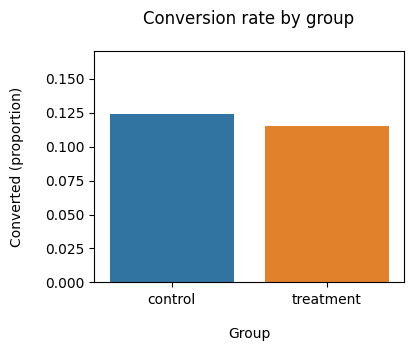

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(4,3))

sns.barplot(x=ab_test['group'], y=ab_test['converted'], errorbar=('ci', False))

plt.ylim(0, 0.17)
plt.title('Conversion rate by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15);

#  Analyze test results

## Use Z-test to calculate the P-value

In [20]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
control_results = ab_test[ab_test['group'] == 'control']['converted']
treatment_results = ab_test[ab_test['group'] == 'treatment']['converted']

In [21]:
n_con = control_results.count()
n_treat = treatment_results.count()
print(n_con)
print(n_treat)

4720
4720


In [22]:
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

print(f'successes: {successes}')
print(f'nobs: {nobs}')

successes: [586, 542]
nobs: [4720, 4720]


In [23]:
z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)
print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: 1.40
p-value: 0.163
ci 95% for control group: [0.115, 0.134]
ci 95% for treatment group: [0.106, 0.124]


# Conclusion and recommendation

## Conclusion

 - p-value 16.3% is far above alpha 5% 
 
 - Null hypothesis is true
 
- There is no different between new design and old design impact on conversion rate 

## Recommendations

- Try different variations of product page design 
- Collect feedback from users to understand their preferences
- improve customer experience
- Enhancing Product Competitiveness
